In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import re

In [4]:
# File names
file_name= 'predicted_close_diff_2024-12-18.npy'
file_name_2 = 'predicted_close_diff_2024-12-19.npy'
file_name_3 = 'predicted_close_diff_2024-12-20.npy'
file_name_4 = 'predicted_close_diff_2024-12-21.npy'

In [5]:
# Load the numpy files
predicted_close_diff = np.load(f"/Users/daviddiaz/Desktop/Main/crypto-lstm-predictor/modeling_predictions/{file_name}")
predicted_close_diff_2 = np.load(f"/Users/daviddiaz/Desktop/Main/crypto-lstm-predictor/modeling_predictions/{file_name_2}")
predicted_close_diff_3 = np.load(f"/Users/daviddiaz/Desktop/Main/crypto-lstm-predictor/modeling_predictions/{file_name_3}")
predicted_close_diff_4 = np.load(f"/Users/daviddiaz/Desktop/Main/crypto-lstm-predictor/modeling_predictions/{file_name_4}")

In [6]:
# Convert the NumPy array to a DataFrame
predicted_close_diff_df = pd.DataFrame(predicted_close_diff, columns=['Predicted_Close_Diff'])
predicted_close_diff_df_2 = pd.DataFrame(predicted_close_diff_2, columns=['Predicted_Close_Diff'])
predicted_close_diff_df_3 = pd.DataFrame(predicted_close_diff_3, columns=['Predicted_Close_Diff'])
predicted_close_diff_df_4 = pd.DataFrame(predicted_close_diff_4, columns=['Predicted_Close_Diff'])

In [11]:
# Create a tuple of the dataframes
dataframes = (predicted_close_diff_df, predicted_close_diff_df_2, predicted_close_diff_df_3, predicted_close_diff_df_4)
# Create a tuple of the files
file_names = (file_name, file_name_2, file_name_3, file_name_4)

In [12]:
# List to store modified DataFrames for concatenation
updated_dataframes = []

# Process each DataFrame and save it
for dataframe, file_name in zip(dataframes, file_names):
    # Extract the date from the file name
    date_match = re.search(r'(\d{4}-\d{2}-\d{2})', file_name)
    if date_match:
        date_extracted = date_match.group(1)
        # Add the date as a new column to the DataFrame
        dataframe['Date'] = date_extracted
   
    # Append the modified DataFrame to the list
    updated_dataframes.append(dataframe)

# Concatenate all modified DataFrames into a single DataFrame
concatenated_df = pd.concat(updated_dataframes, ignore_index=True)

In [39]:
# Obtain live data for the real values
df = pd.read_csv('data_ingested/ETH_USD_2024-12-21.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Ensure it's a datetime object
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Close_diff'] = df['Close'].diff()
live_df = df.dropna(subset='Close_diff').copy()

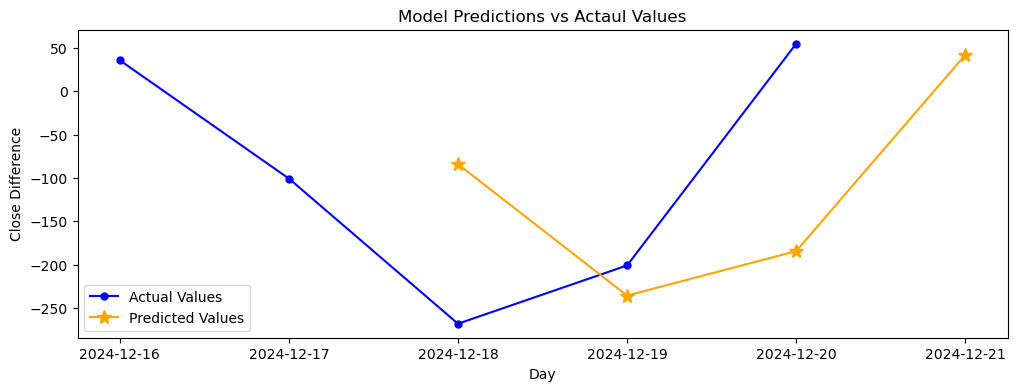

In [43]:
# Plot the predictions to the actual 
plt.figure(figsize=(12, 4))
plt.plot(live_df['Date'], live_df['Close_diff'], marker='o', markersize=5, label='Actual Values', color='blue')
plt.plot(concatenated_df['Date'], concatenated_df['Predicted_Close_Diff'], marker='*', markersize=10, label='Predicted Values', color='orange')
plt.title('Model Predictions vs Actaul Values')
plt.xlabel('Day')
plt.ylabel('Close Difference')
plt.legend()
plt.show()

In [49]:
# Calculate MAE
mae = mean_absolute_error(live_df['Close_diff'].tail(3), concatenated_df['Predicted_Close_Diff'].head(3))
print(f"Mean Squar Error (MAE): {mae}")

Mean Squar Error (MAE): 152.50393422444662
